In [15]:
#%pip install ipywidgets
#%pip install pandas-profiling
#%pip install sweetviz
#%pip install autoviz
#%pip install dtale
#%pip install umap-learn

In [16]:
import pandas as pd
import umap.umap_ as umap
#import sweetviz #usado mais pra dados rotulados
import dtale
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [17]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [18]:
rootPath = "C:\\Users\\mlb\\Teste_VOCs\\DataFiles"
columnsName = ["0","1","timestamp","TGS826","TGS2611","TGS2603","TGS813","TGS822","TGS2602","TGS823","temperatura","pressao","umidade"]
columnsName2 = ["index","timestamp","TGS826","TGS2611","TGS2603","TGS813","TGS822","TGS2602","TGS823","temperatura","pressao","umidade","culture_day","c_type"]

In [19]:
#Load albicans file data
#data dictionary
# Albicans = 1
# Glabrata = 2
# Haemulonii = 3
# Kodamaea_ohmeri = 4
# Krusei = 5
# Parapsilosis = 6

#Load parapsilosis file data
df_parapsilosis = pd.read_csv(rootPath+"\\parapsilosis.csv", delim_whitespace=True, header=None, names=columnsName)
df_parapsilosis = df_parapsilosis.drop(["0","1"], axis=1)
df_parapsilosis.dropna(inplace=True)
df_parapsilosis.reset_index(drop=True, inplace=True)
df_parapsilosis['c_type'] = 6
df_parapsilosis['culture_day'] = 1

df_parapsilosis2 = pd.read_csv(rootPath+"\\parapsilosis2.csv", delim_whitespace=True, header=None, names=columnsName)
df_parapsilosis2 = df_parapsilosis2.drop(["0","1"], axis=1)
df_parapsilosis2.dropna(inplace=True)
df_parapsilosis2.reset_index(drop=True, inplace=True)
df_parapsilosis2['c_type'] = 6
df_parapsilosis2['culture_day'] = 1

df_parapsilosis3 = pd.read_csv(rootPath+"\\parapsilosis3.csv", delim_whitespace=True, header=None, names=columnsName)
df_parapsilosis3 = df_parapsilosis3.drop(["0","1"], axis=1)
df_parapsilosis3.dropna(inplace=True)
df_parapsilosis3.reset_index(drop=True, inplace=True)
df_parapsilosis3['c_type'] = 6
df_parapsilosis3['culture_day'] = 1

df_parapsilosis_dia2 = pd.read_csv(rootPath+"\\parapsilosis_dia2.csv", delim_whitespace=True, header=None, names=columnsName)
df_parapsilosis_dia2 = df_parapsilosis_dia2.drop(["0","1"], axis=1)
df_parapsilosis_dia2.dropna(inplace=True)
df_parapsilosis_dia2.reset_index(drop=True, inplace=True)
df_parapsilosis_dia2['c_type'] = 6
df_parapsilosis_dia2['culture_day'] = 2

df_parapsilosis2_dia2 = pd.read_csv(rootPath+"\\parapsilosis_dia3.csv", delim_whitespace=True, header=None, names=columnsName)
df_parapsilosis2_dia2 = df_parapsilosis2_dia2.drop(["0","1"], axis=1)
df_parapsilosis2_dia2.dropna(inplace=True)
df_parapsilosis2_dia2.reset_index(drop=True, inplace=True)
df_parapsilosis2_dia2['c_type'] = 6
df_parapsilosis2_dia2['culture_day'] = 2

In [20]:
print(len(df_parapsilosis))
print(len(df_parapsilosis2))
print(len(df_parapsilosis3))
print(len(df_parapsilosis_dia2))
print(len(df_parapsilosis2_dia2))

2386
2401
2396
2393
2386


In [21]:
df_parapsilosis.describe()

,timestamp,TGS826,TGS2611,TGS2603,TGS813,TGS822,TGS2602,TGS823,temperatura,pressao,umidade,c_type,culture_day
count,2.386000e+03,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.0,2386.0
mean,1.623160e+09,96325.687343,7304.923722,6067.636630,65611.722548,3426.304275,26381.169321,7749.151299,57.013290,77.062661,11.556215,6.0,1.0
std,6.157592e+02,5292.627986,0.925782,128.890515,4235.263801,277.216826,4791.836701,94.696360,1.895087,21.216252,3.297221,0.0,0.0
min,1.623159e+09,73520.000000,7291.000000,6003.000000,50830.000000,3020.000000,18860.000000,7509.000000,52.480000,53.770000,7.340000,6.0,1.0
25%,1.623159e+09,91780.000000,7305.000000,6009.000000,63150.000000,3217.000000,22850.000000,7710.000000,55.670000,54.310000,8.250000,6.0,1.0
50%,1.623160e+09,94210.000000,7305.000000,6026.000000,66095.000000,3369.500000,25425.000000,7767.500000,57.240000,74.380000,11.590000,6.0,1.0
75%,1.623160e+09,101100.000000,7305.000000,6072.000000,68570.000000,3579.750000,29077.500000,7808.000000,58.580000,100.150000,13.840000,6.0,1.0
max,1.623161e+09,107100.000000,7305.000000,6856.000000,74190.000000,5432.000000,63940.000000,7982.000000,60.060000,100.610000,33.580000,6.0,1.0


In [22]:
#Join the albicans dataframes
frames  = [df_parapsilosis,df_parapsilosis2, df_parapsilosis3, df_parapsilosis_dia2, df_parapsilosis2_dia2]
df_parapsilosis_joined = pd.concat(frames)
df_parapsilosis_joined.reset_index(inplace=True)
df_parapsilosis_joined

,index,timestamp,TGS826,TGS2611,TGS2603,TGS813,TGS822,TGS2602,TGS823,temperatura,pressao,umidade,c_type,culture_day
0,0,1.623159e+09,73660.0,7291.0,6003.0,51110.0,5405.0,63940.0,7962.0,54.48,100.26,33.57,6,1
1,1,1.623159e+09,73520.0,7298.0,6009.0,51110.0,5397.0,63840.0,7959.0,54.50,100.11,33.58,6,1
2,2,1.623159e+09,75200.0,7305.0,6009.0,52820.0,5432.0,63740.0,7960.0,54.47,79.30,32.30,6,1
3,3,1.623159e+09,78100.0,7305.0,6009.0,52180.0,5221.0,52420.0,7928.0,54.56,75.78,23.80,6,1
4,4,1.623159e+09,80480.0,7298.0,6003.0,51610.0,5035.0,43940.0,7897.0,54.61,75.51,20.79,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11957,2381,1.623262e+09,87790.0,7171.0,8935.0,38260.0,2307.0,15180.0,7706.0,57.33,54.08,7.23,6,2
11958,2382,1.623262e+09,86770.0,7171.0,8941.0,38200.0,2305.0,15180.0,7710.0,57.32,54.00,7.25,6,2
11959,2383,1.623262e+09,87190.0,7171.0,8941.0,38260.0,2307.0,15180.0,7704.0,57.30,54.08,7.40,6,2
11960,2384,1.623262e+09,87190.0,7171.0,8941.0,38330.0,2297.0,15170.0,7706.0,57.29,54.08,7.25,6,2


In [23]:
d = dtale.show(df_parapsilosis_joined)
d.open_browser()

In [24]:
d = dtale.show(df_parapsilosis_joined.drop(columns=['c_type','index']))
d.open_browser()

In [26]:
df_parapsilosis_joined.to_csv(r'DatasetsJoined\AllParapsilosisCollect.csv', index = False)
df_parapsilosis.to_csv(r'NewDatasets\NewParapsilosis.csv', index = False)
df_parapsilosis2.to_csv(r'NewDatasets\NewParapsilosis2.csv', index = False)
df_parapsilosis3.to_csv(r'NewDatasets\NewParapsilosis3.csv', index = False)
df_parapsilosis_dia2.to_csv(r'NewDatasets\NewParapsilosis_dia2.csv', index = False)
df_parapsilosis2_dia2.to_csv(r'NewDatasets\NewParapsilosis_dia3.csv', index = False)

In [27]:
parapsilosis_data = df_parapsilosis_joined.drop(columns=['c_type'])
scaled_parapsilosis_df = pd.DataFrame(data=StandardScaler().fit_transform(parapsilosis_data), columns=columnsName2[0:13])
scaled_parapsilosis_df

,index,timestamp,TGS826,TGS2611,TGS2603,TGS813,TGS822,TGS2602,TGS823,temperatura,pressao,umidade,culture_day
0,-1.731307,-0.970669,-1.671149,0.079988,-0.838011,0.481764,4.138849,6.049073,1.042922,-0.349944,1.103447,3.186817,-0.815672
1,-1.729859,-0.970629,-1.690196,0.084539,-0.836653,0.481764,4.127230,6.035752,1.033455,-0.347231,1.096334,3.188303,-0.815672
2,-1.728411,-0.970590,-1.461630,0.089090,-0.836653,0.633234,4.178064,6.022431,1.036611,-0.351300,0.109427,2.998017,-0.815672
3,-1.726963,-0.970564,-1.067082,0.089090,-0.836653,0.576543,3.871608,4.514498,0.935622,-0.339093,-0.057508,1.734401,-0.815672
4,-1.725515,-0.970551,-0.743280,0.084539,-0.838011,0.526053,3.601462,3.384880,0.837790,-0.332312,-0.070313,1.286932,-0.815672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11957,1.716227,1.270946,0.251253,0.001969,-0.174779,-0.656476,-0.360677,-0.446231,0.235015,0.036609,-1.086623,-0.728907,1.225983
11958,1.717675,1.270960,0.112481,0.001969,-0.173421,-0.661790,-0.363582,-0.446231,0.247639,0.035252,-1.090417,-0.725934,1.225983
11959,1.719123,1.270975,0.169623,0.001969,-0.173421,-0.656476,-0.360677,-0.446231,0.228703,0.032540,-1.086623,-0.703635,1.225983
11960,1.720571,1.270985,0.169623,0.001969,-0.173421,-0.650275,-0.375201,-0.447563,0.235015,0.031183,-1.086623,-0.725934,1.225983


In [ ]:
d = dtale.show(df_parapsilosis_joined)
d.open_browser()

In [28]:
reducer = umap.UMAP()

In [29]:
#Usa os dados reescalonados para a redução de dimensionalidade
embedding = reducer.fit_transform(scaled_parapsilosis_df)
embedding.shape

(11962, 2)

In [14]:
#Usa as classes do array original pra plotar a 
# plt.scatter(
#     embedding[:, 0],
#     embedding[:, 1],
#     c=[sns.color_palette()[x] for x in df_albicans_joined.c_type])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the C. Albicans dataset', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of the C. Parapsilosis dataset')

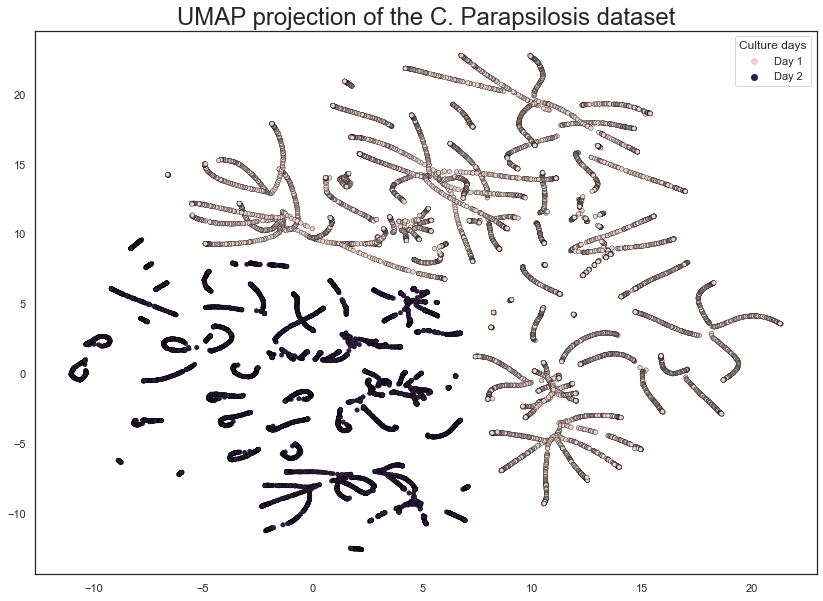

In [30]:
ax = sns.scatterplot(data=embedding, x=embedding[:, 0], y=embedding[:, 1],cmap="RdYlGn_r", s=20, ec='black',  hue=df_parapsilosis_joined.culture_day)
handles, labels  =  ax.get_legend_handles_labels()
plt.legend(handles, ["Day 1", "Day 2","Day 3"], loc='upper right', title="Culture days")

plt.title('UMAP projection of the C. Parapsilosis dataset', fontsize=24)

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(scaled_parapsilosis_df)
result = pd.DataFrame(data = principalComponents
             , columns = ['PCA0', 'PCA1','PCA2'])

Text(0.5, 0.92, 'PCA projection of the C. Parapsilosis dataset')

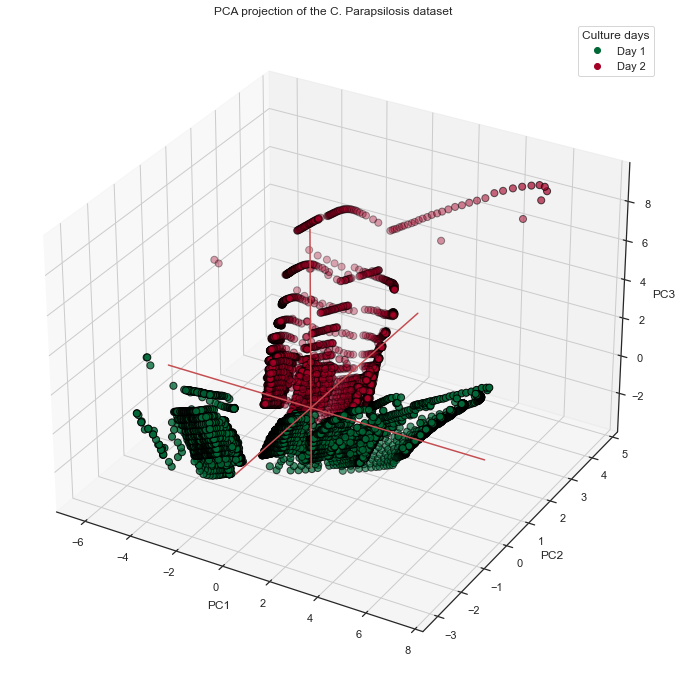

In [32]:
fig = plt.figure(figsize=[15,12])

ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=df_parapsilosis_joined.culture_day, cmap="RdYlGn_r", s=50, ec='black')
handles, labels = scatter.legend_elements()
legend2 = ax.legend(handles, ["Day 1","Day 2","Day 3"], loc="upper right", title="Culture days")

# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA projection of the C. Parapsilosis dataset")

In [33]:
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(scaled_parapsilosis_df)
result2 = pd.DataFrame(data = principalComponents2
             , columns = ['PCA0', 'PCA1'])

Text(0.5, 1.0, 'PCA projection of the C. Parapsilosis dataset')

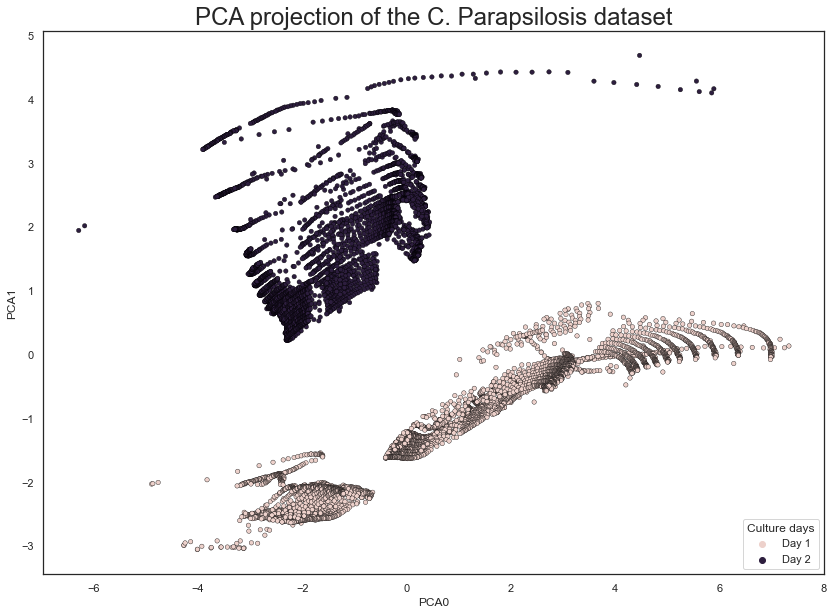

Executing shutdown due to inactivity...


2021-07-05 23:11:09,773 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-07-05 23:11:26,103 - INFO     - Executing shutdown...
D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\dtale\app.py:397: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



In [34]:
ax = sns.scatterplot(data=result2, x=result2['PCA0'], y=result2['PCA1'],cmap="RdYlGn_r", s=20, ec='black',  hue=df_parapsilosis_joined.culture_day)
handles, labels  =  ax.get_legend_handles_labels()
plt.legend(handles,["Day 1","Day 2","Day 3"], loc='lower right', title="Culture days")
plt.title('PCA projection of the C. Parapsilosis dataset', fontsize=24)